# DSCI 100 – Individual Planning Stage  
## Project Title: Predicting Newsletter Subscription from Player Characteristics

### Research Questions

**Broad Question:**  
What player characteristics and behaviours are most predictive of subscribing to the game-related newsletter, and how do these features differ between various player types?

**Specific Question:**  
Can player experience level, gender, age, and total hours played be used to predict whether a player subscribes to the newsletter?


## 1. Project Overview

In this project, I aim to explore how the different categorical variables in the *players.csv* dataset relate to newsletter subscription.  
Specifically, I want to examine whether patterns in experience level, gender, or other player characteristics reveal meaningful trends 
that could help us understand and eventually predict which players are more likely to subscribe.

In [1]:
library(tidyverse)
library(repr)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## 2. Reading the Dataset

After loading the `players.csv` file, the table shows all player information along with the types of each variable. I can see the important variables I’ll be using throughout the project, such as experience level, age, gender, hours played, and subscription status. There are also some missing values (for example in age), which I need to tidy before I go further.

In [2]:
players<-read_csv("players.csv")

players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


## 3. Tidying The Data


Before doing any analysis, I cleaned the dataset so that everything I study later is reliable. I removed rows that were missing important information because incomplete entries can make summaries and graphs misleading. I also organized the categorical columns (like experience level, gender, and subscription status) so they are treated properly when I create visualizations or run a classification model.

Overall, this step just makes the data more consistent and easier to work with, and it ensures that any patterns I find later come from clean and complete information.

In [6]:
# Clean the players dataset:
#  remove missing values
#  convert categorical columns to factors

players_clean <- players |>

#This drops all null values from the following columns
  drop_na(experience, gender, Age, played_hours, subscribe) |>
  

#changes the data into factors 
mutate(
    experience = as.factor(experience),
    gender     = as.factor(gender),
    subscribe  = as.factor(subscribe)
  )

# View cleaned data
players_clean

# Check structure
glimpse(players_clean)

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<fct>,<chr>,<dbl>,<chr>,<fct>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Veteran,FALSE,71453e425f07d10da4fa2b349c83e73ccdf0fb3312f778b35c5802c3292c87bd,0.3,Pascal,Male,22
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17


Rows: 194
Columns: 7
$ experience   <fct> Pro, Veteran, Veteran, Amateur, Regular, Amateur, Regular…
$ subscribe    <fct> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, FALSE, TRUE, T…
$ hashedEmail  <chr> "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8…
$ played_hours <dbl> 30.3, 3.8, 0.0, 0.7, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 1.6, 0…
$ name         <chr> "Morgan", "Christian", "Blake", "Flora", "Kylie", "Adrian…
$ gender       <fct> Male, Male, Male, Female, Male, Female, Female, Male, Mal…
$ Age          <dbl> 9, 17, 17, 21, 21, 17, 19, 21, 47, 22, 23, 17, 25, 22, 17…


## 4. Visualising The Data
I added a few visualizations to the notebook to make it easier to see the general trends in the dataset and understand how the different variables behave. Looking at the data in a visual way helps me notice patterns that aren’t obvious from just reading the table, especially when comparing groups like subscribed vs. not subscribed. These plots give me a clearer picture of how the players are distributed across the main categories and help me get a better sense of what might be important when answering my research question later on. Overall, the visualizations are just a simple way to explore the data before moving into any deeper analysis.


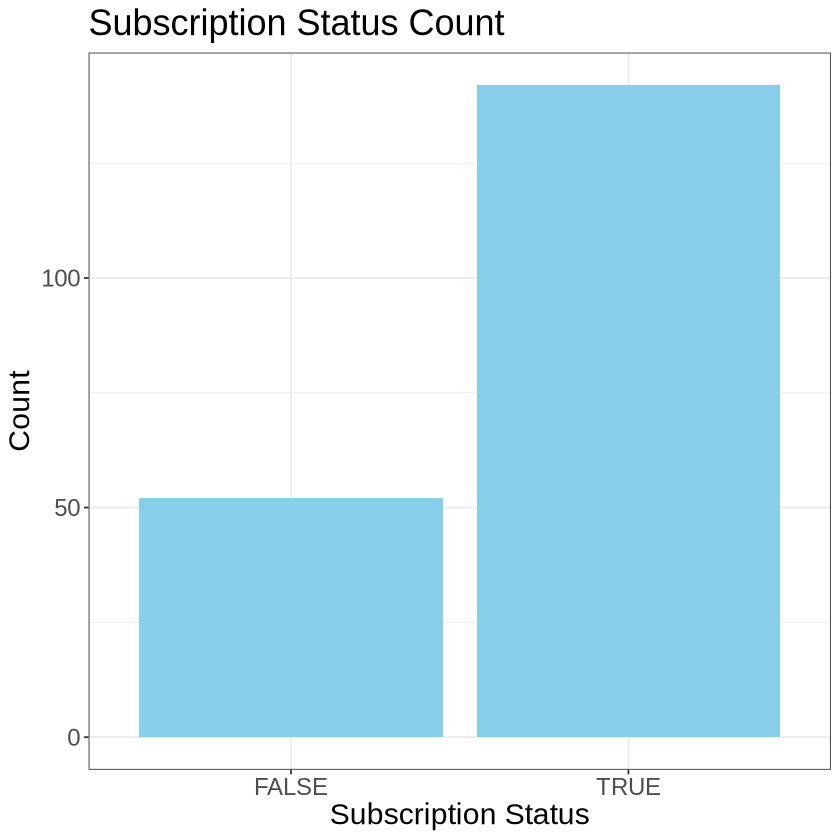

In [22]:
plot_subscribe_count <- players_clean |>
  ggplot(aes(x = subscribe)) +
  geom_bar(fill = "skyblue") +
  labs(
    title = "Subscription Status Count",
    x = "Subscription Status",
    y = "Count"
  ) +
  theme_bw() +
  theme(text = element_text(size = 18))

plot_subscribe_count

This plot shows how many players in the dataset are subscribed versus not subscribed. Even though it is a simple count, it gives me an important first look at how the response variable is distributed across the two groups.

Since my goal is to understand what kinds of players are more likely to subscribe to the newsletter, it helps to see that the subscribed group is noticeably larger. This suggests there might be certain player characteristics that contribute to why more people end up subscribing.

At the same time, this imbalance alone doesn’t tell me very much. Knowing that one group is bigger doesn’t explain *why* that is the case or what factors might be influencing it. This is why I need to look deeper into how different variables—like experience level, gender, and hours played—compare between subscribed and unsubscribed players.

Overall, this plot doesn’t answer the research question by itself, but it sets the stage for the next visualizations where I explore differences between the two groups.


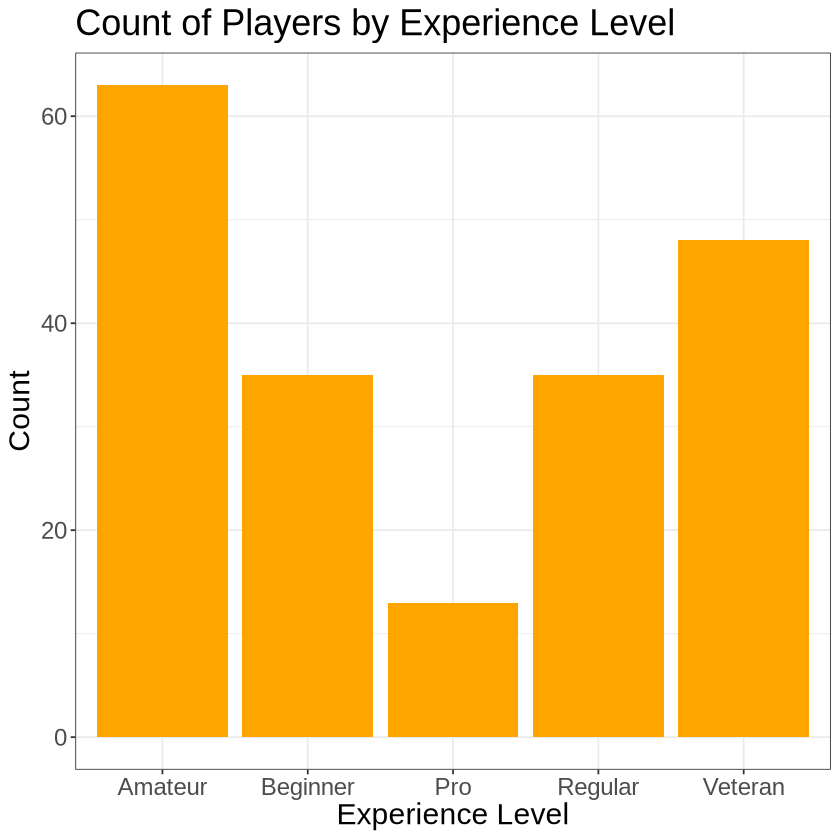

In [24]:
plot_experience_count <- players_clean |>
  ggplot(aes(x = experience)) +
  geom_bar(fill = "orange") +
  labs(
    title = "Count of Players by Experience Level",
    x = "Experience Level",
    y = "Count"
  ) +
  theme_bw() +
  theme(text = element_text(size = 18))

plot_experience_count

The next idea I had was to look at how players are spread across different experience levels. Since experience is a categorical variable, I used another bar plot to see how many players fall into each group. This gives me a general sense of whether certain experience levels are more common in the dataset.

Understanding the distribution of experience levels is useful because experience might be one of the characteristics that influences whether someone subscribes to the newsletter. If one experience level is heavily over-represented, that could shape the patterns I see later when comparing subscribers and non-subscribers.

While this plot doesn’t directly connect to subscription yet, it helps me understand what the dataset looks like before combining experience level with subscription status. Knowing which groups are large or small also matters when interpreting later visualizations, since differences between groups might simply come from how many players each category has.


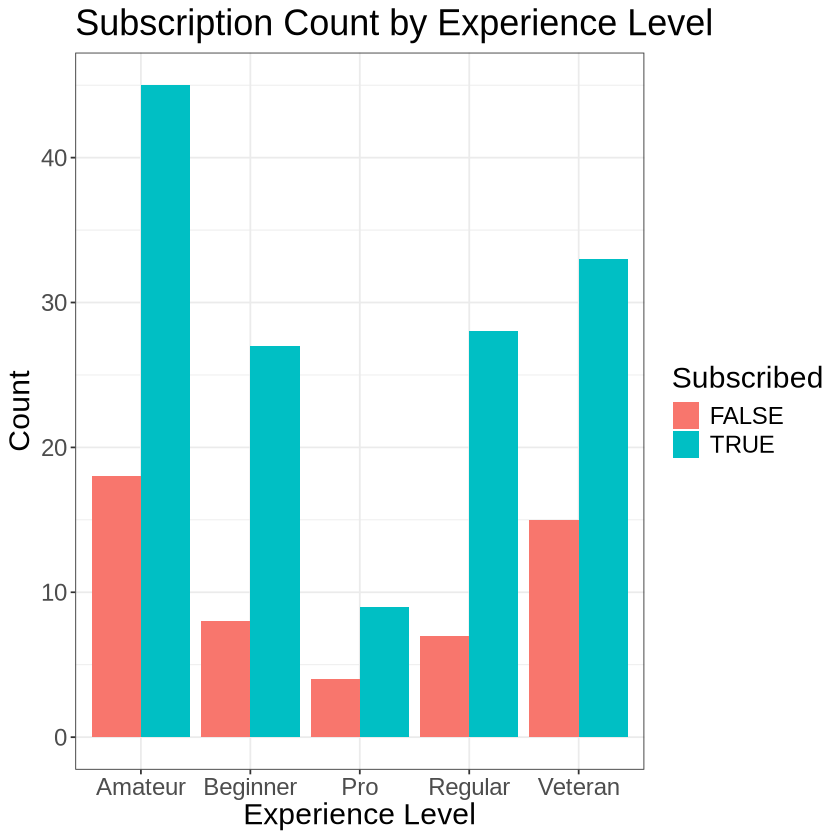

In [26]:
plot_exp_sub <- players_clean |>
  ggplot(aes(x = experience, fill = subscribe)) +
  geom_bar(position = "dodge") +
  labs(
    title = "Subscription Count by Experience Level",
    x = "Experience Level",
    y = "Count",
    fill = "Subscribed"
  ) +
  theme_bw() +
  theme(text = element_text(size = 18))

plot_exp_sub

The next step I wanted to explore was whether experience level has anything to do with players subscribing to the newsletter. A grouped bar chart makes sense here because it lets me compare two categorical variables at the same time: a player’s experience category and whether they subscribed. When I look at the plot, I can clearly see how subscriptions are distributed across Amateur, Regular, Veteran, and Pro players. This helps me check for any early patterns—like if more experienced players are more likely to subscribe, or if the trend is actually the opposite. Even though this graph doesn’t confirm anything by itself, it helps me narrow down which variables might actually matter later when I build the classification model. It also gives a clearer picture of how balanced or unbalanced each experience group is in terms of subscribers versus non-subscribers.

## 5. Plan and Method
For this project, I plan to use a K-Nearest Neighbours (KNN) classification model to predict whether a player subscribes to the newsletter. Since subscribe is a binary categorical variable, a classification method is required, and KNN is one of the main classification approaches taught in this course. KNN works by finding players who are most similar based on variables like experience level, age, gender, and total hours played, and then “voting” on whether the new player is more likely to be subscribed or not.

This method is appropriate because it does not require strong assumptions about linear relationships, which is useful in this dataset since most of the predictors are categorical and unevenly distributed. The main limitation of KNN is that its performance depends heavily on the choice of k and the scale of the predictors, so I will need to ensure that variables are properly pre-processed and that I test multiple values of k. To evaluate the model, I plan to use a training /testing split (most likely 75/25) and compare accuracy across different k values, selecting the model that performs best on unseen data.